<a href="https://colab.research.google.com/github/biiikrammm/Assigment-DenveyEduGrow-/blob/main/DenveyEduGrow_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- First 10 Rows ---
   age  experience_years         salary  education_level  performance_score  \
0   38         13.169259   87992.047021                3          10.000000   
1   33         10.158709   81394.373857                2           6.287553   
2   40         17.314571   98192.741376                4           6.240417   
3   47         23.395445  110943.544814                4           6.600911   
4   33         10.677429   72324.567452                5           4.314156   
5   33         11.808102   75880.596857                3           6.711367   
6   47         28.772372  114702.022499                3           6.361301   
7   41         19.349156   98587.916505                4           7.725591   
8   31          9.515101   78793.359369                3           8.012634   
9   39         16.851108  110684.987255                5          10.000000   

   hours_per_week  projects_completed  sick_days  vacation_days  \
0       60.000000                  10   

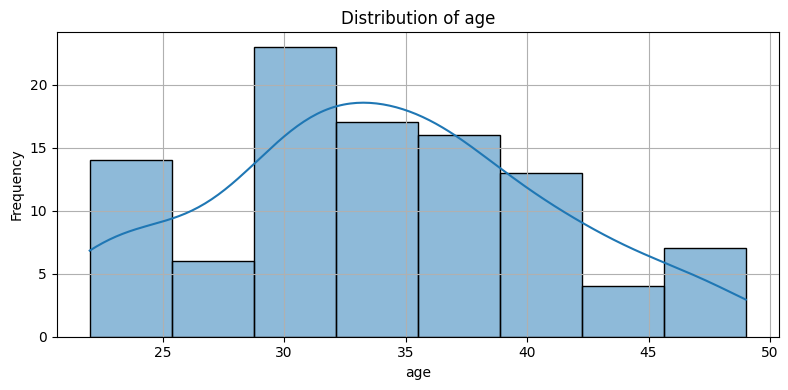

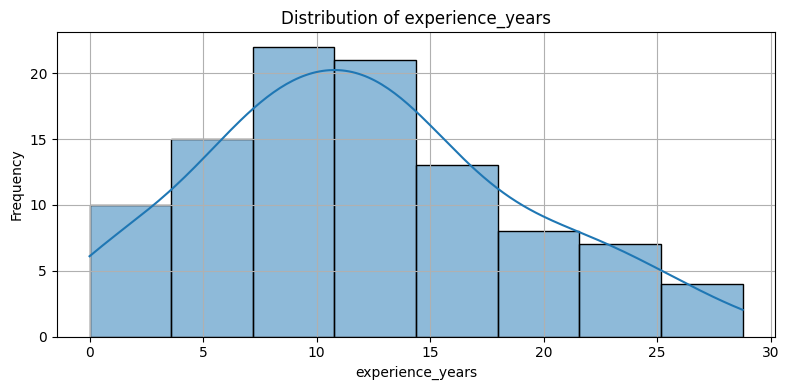

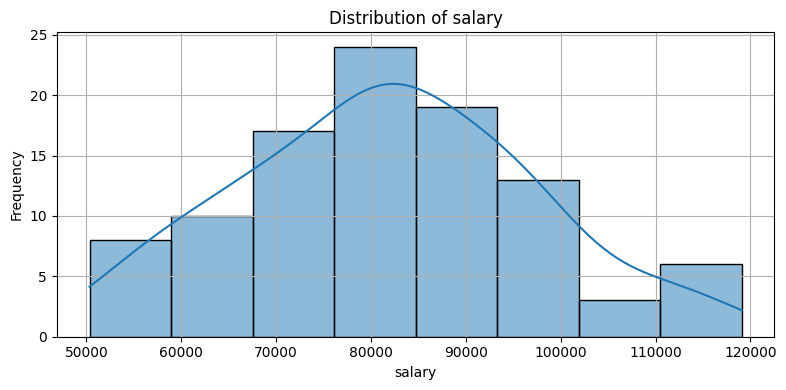

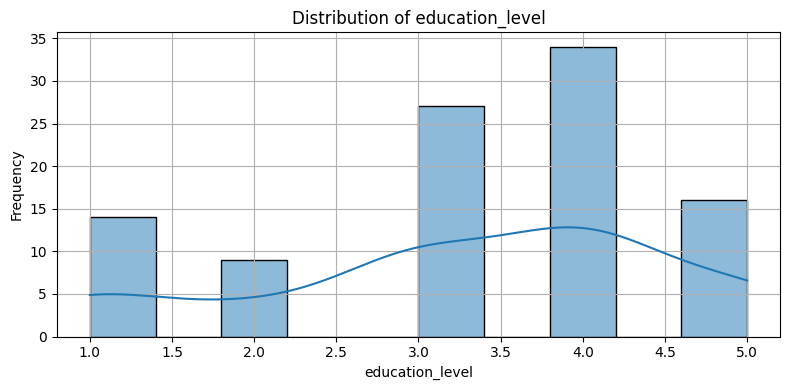

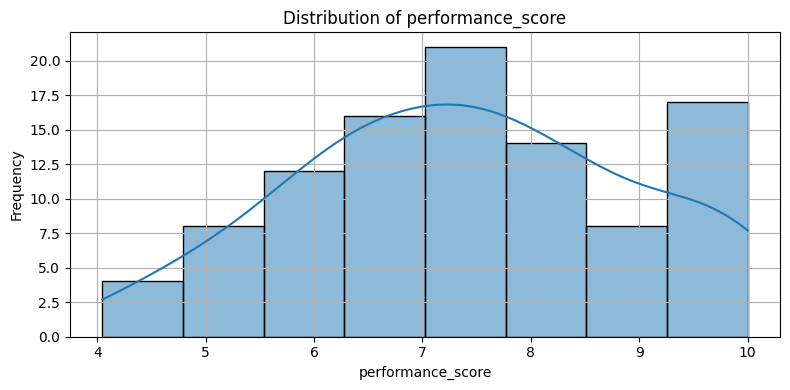

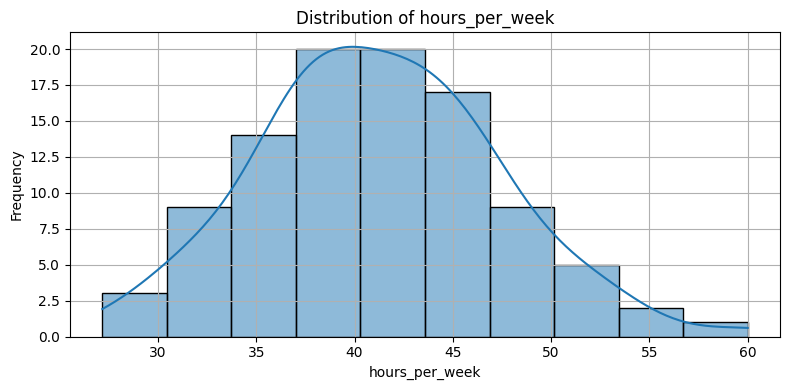

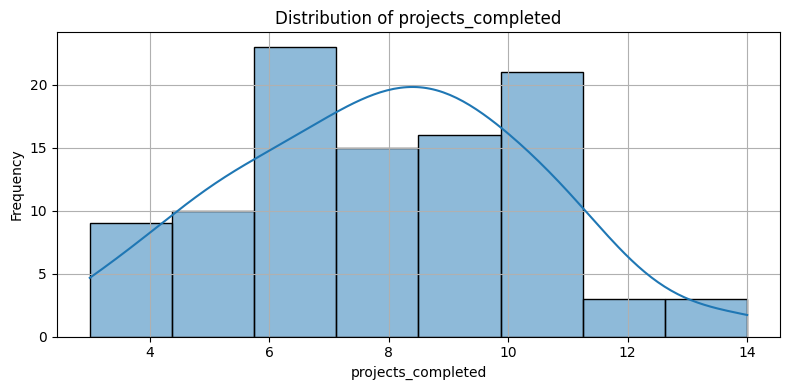

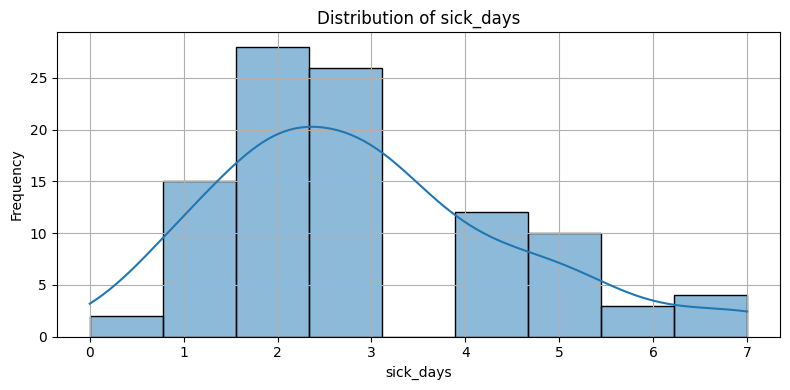

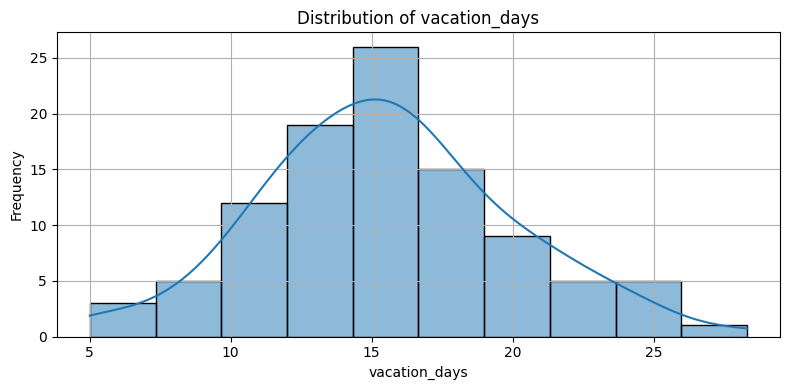

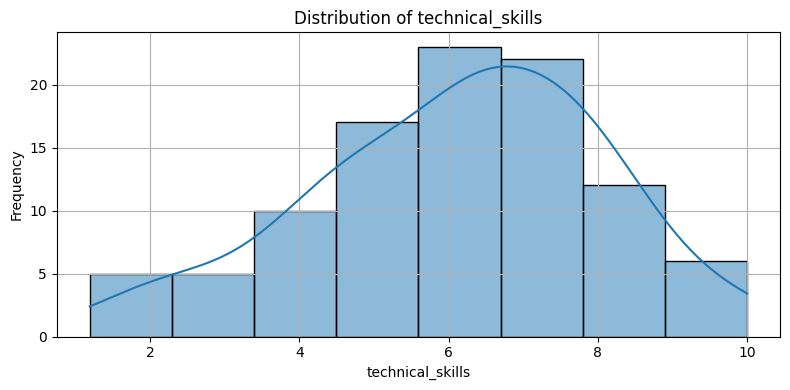

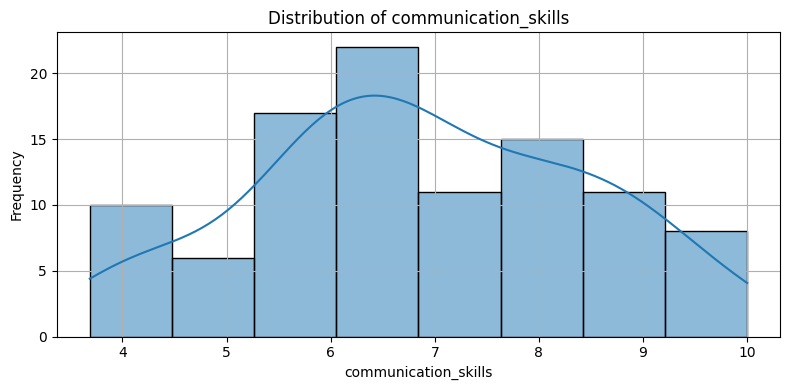

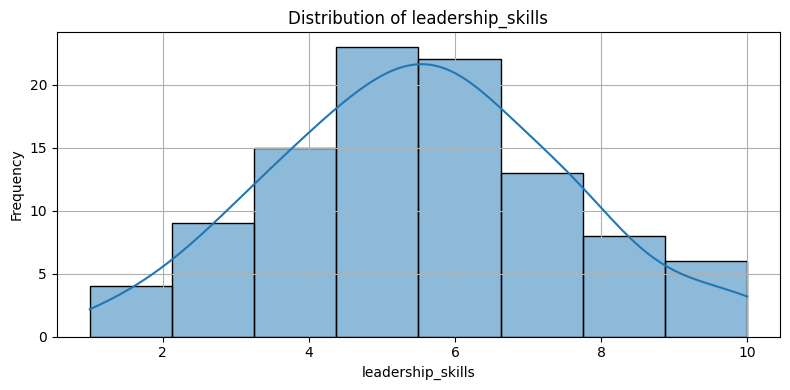

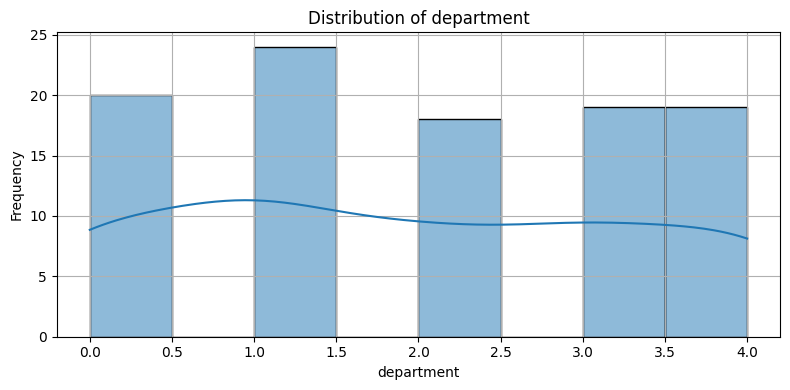

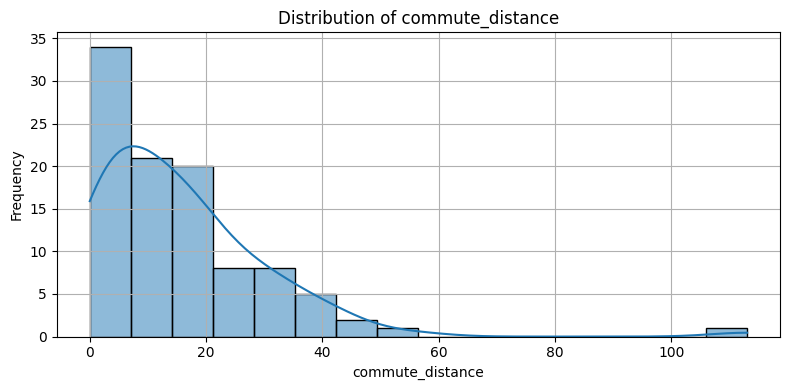

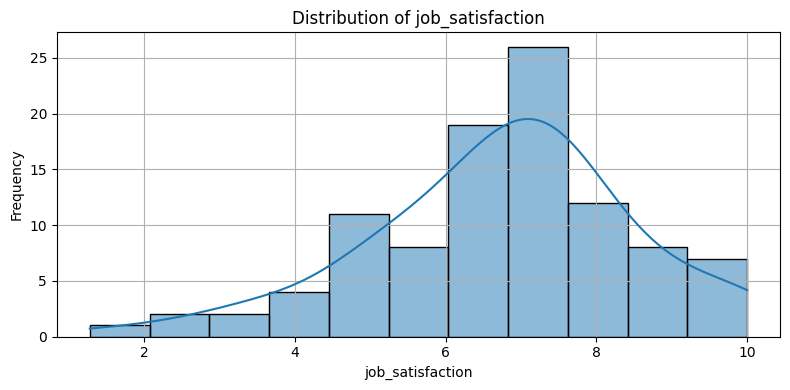

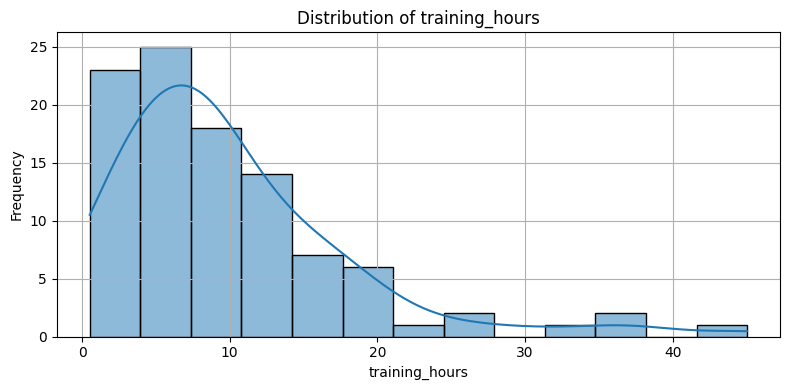

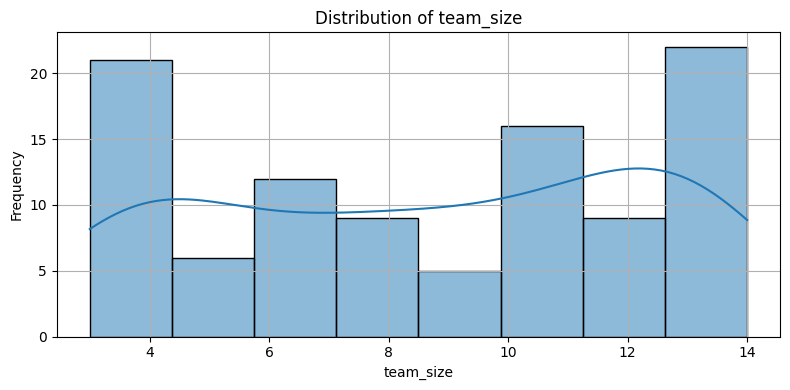

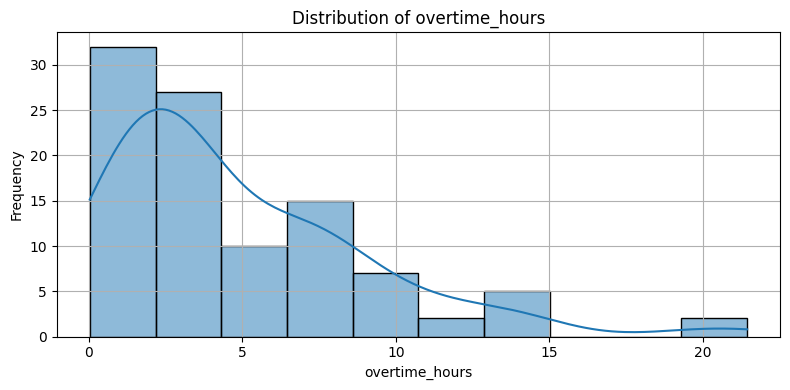

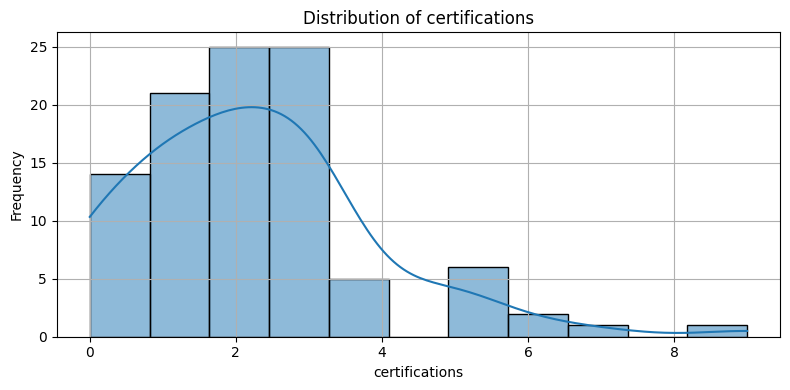

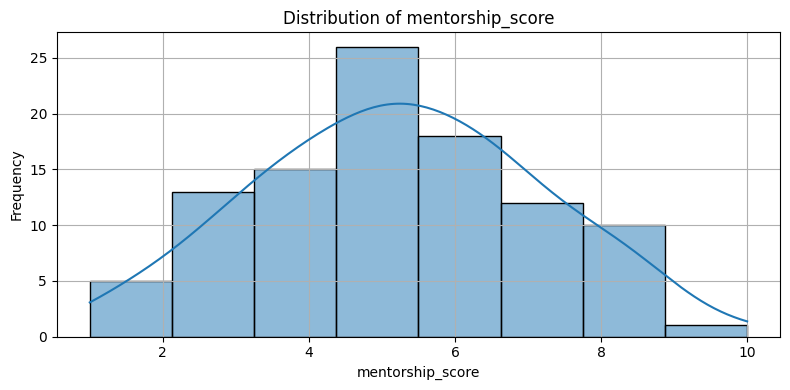


--- Frequency Analysis ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("synthetic_employee_dataset.csv")

# 1. Display the first 10 rows of the dataset
print("\n--- First 10 Rows ---")
print(df.head(10))

# 2. Show complete dataset information including data types
print("\n--- Dataset Info ---")
print(df.info())

# 3. Determine and display the number of columns and rows
print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# 4. Univariate Analysis

## Descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

## Value counts for categorical variables
print("\n--- Value Counts for Categorical Columns ---")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

## Distribution plots for numerical variables
print("\n--- Distribution Plots ---")
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Frequency analysis for categorical columns (bar plots)
print("\n--- Frequency Analysis ---")
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# STEP 1: Load dataset
df = pd.read_csv("housing.csv")  # Replace with actual path if needed

# Drop rows with missing values
df_cleaned = df.dropna()

# STEP 2: Split features and target
X = df_cleaned.drop("median_house_value", axis=1)
y = df_cleaned["median_house_value"]

# Separate categorical and numerical features
categorical_features = ["ocean_proximity"]
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Create the model pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 3: Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# STEP 4: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.6488
Mean Squared Error: 4802173538.60
